In [14]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

In [15]:
today = date.today()
dati = pd.read_excel(f'../../Dati/output/dati_larghi_{today}_AN.xlsx')

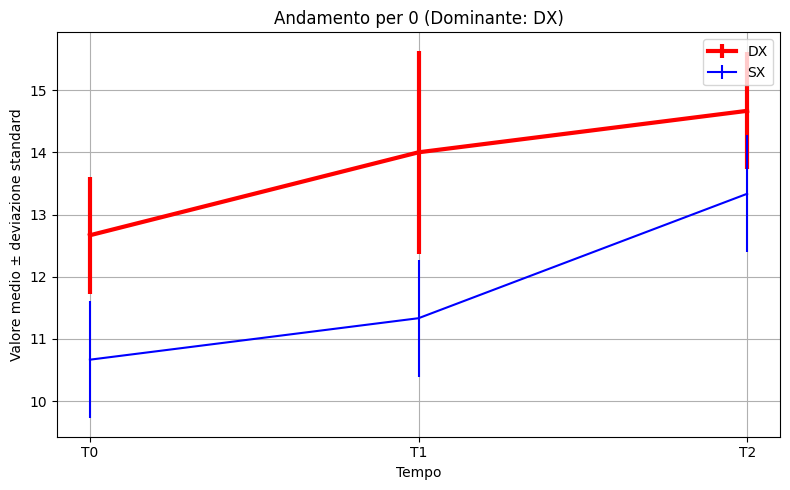

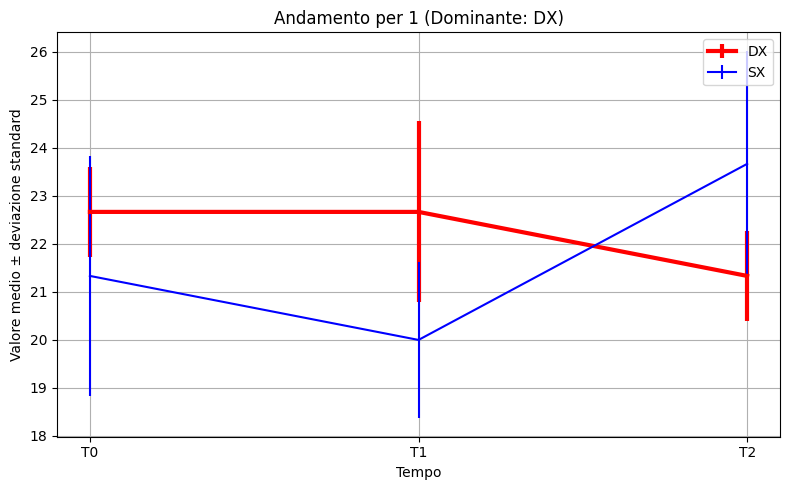

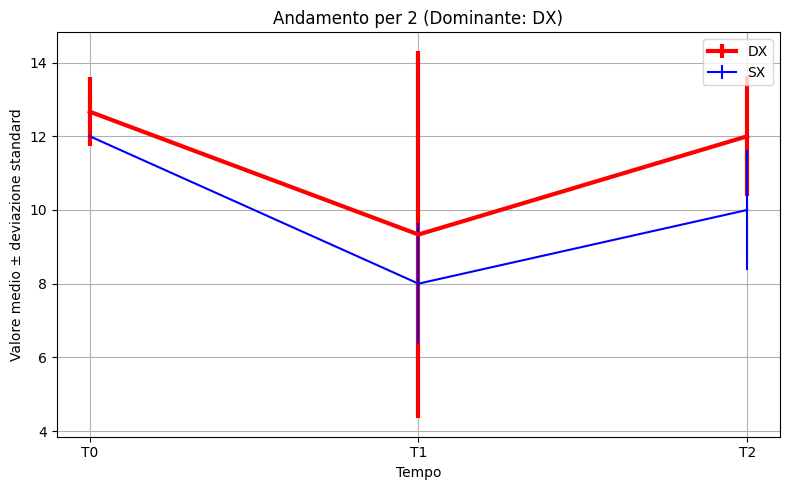

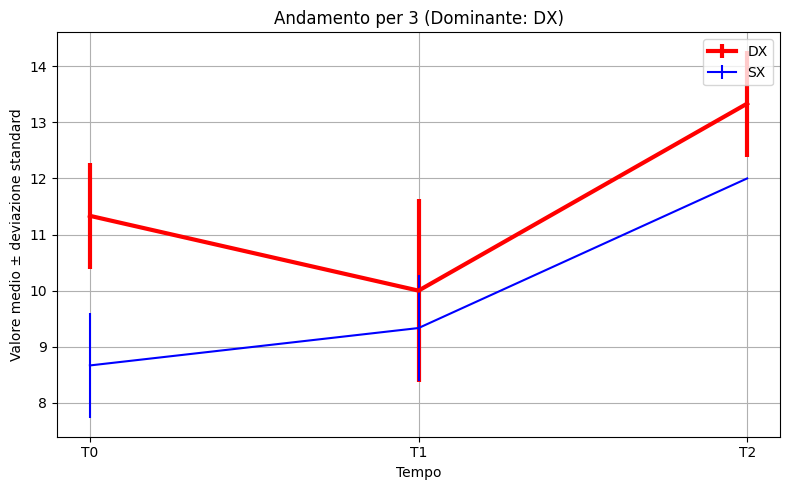

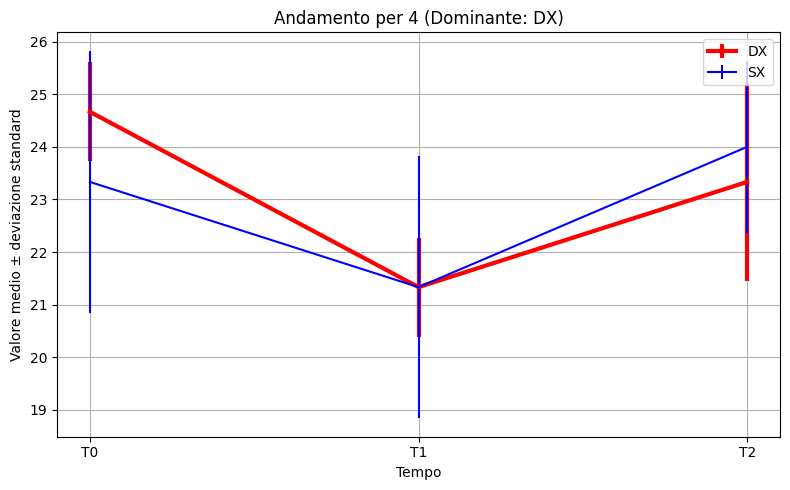

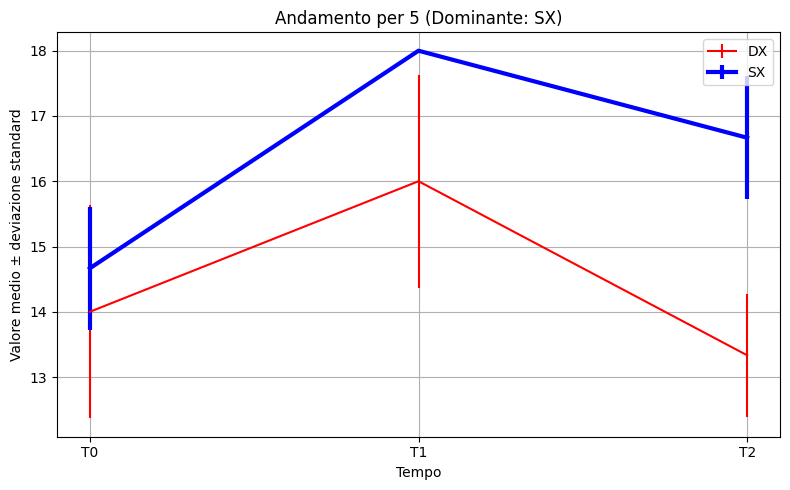

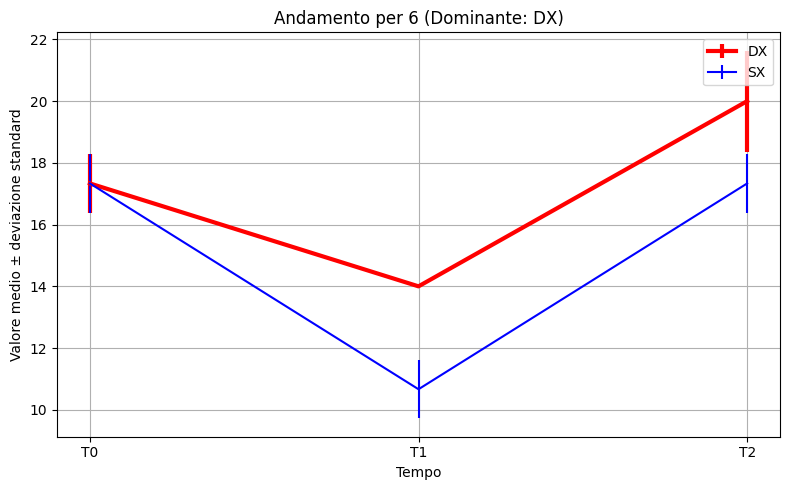

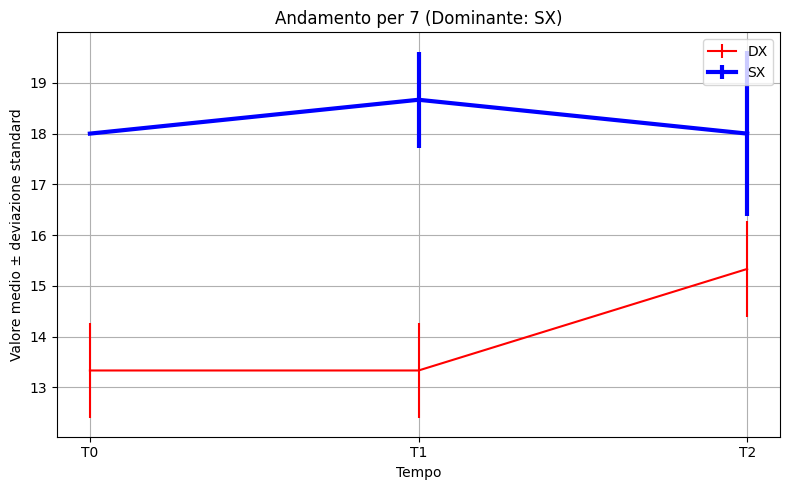

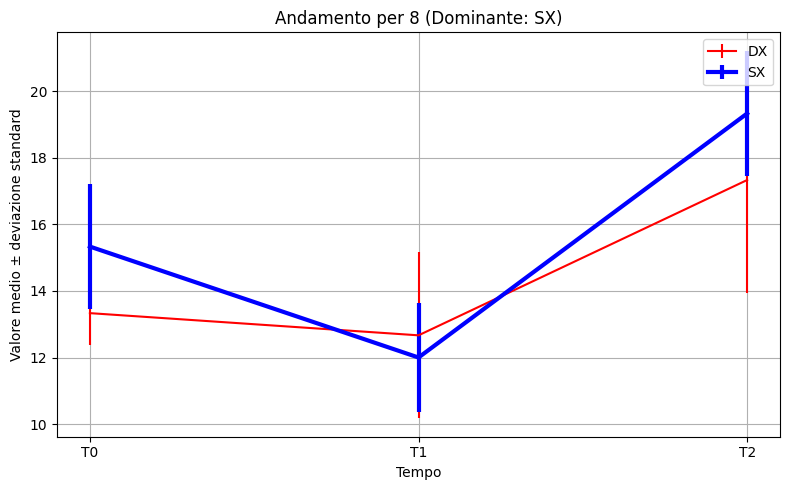

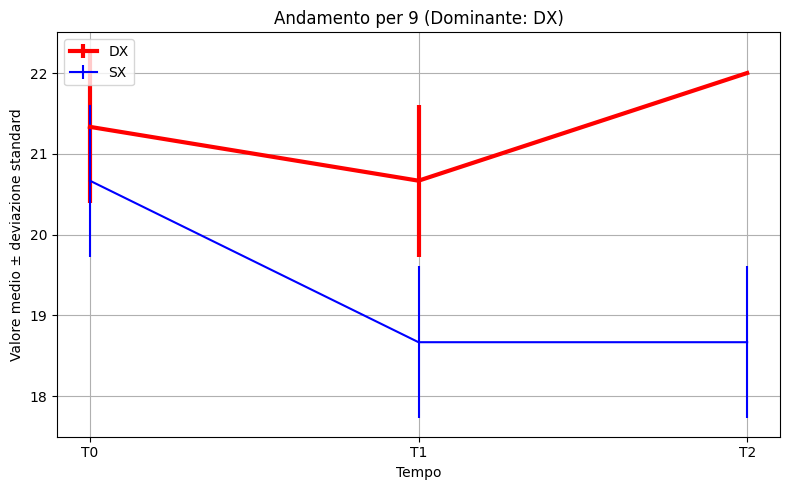

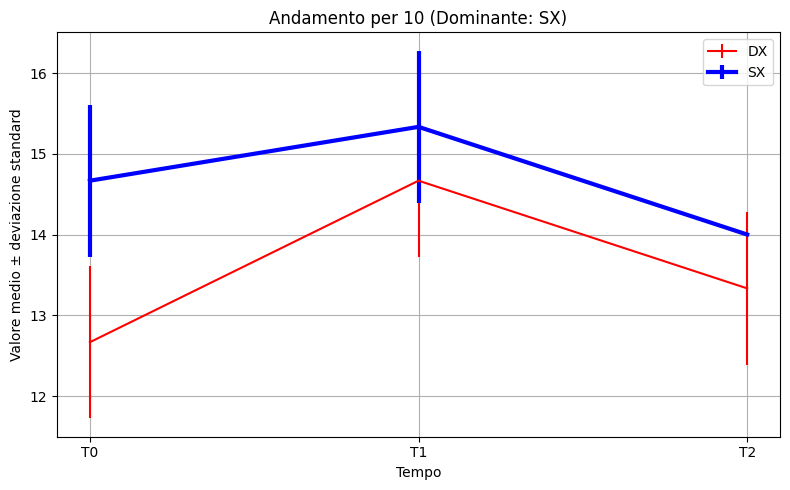

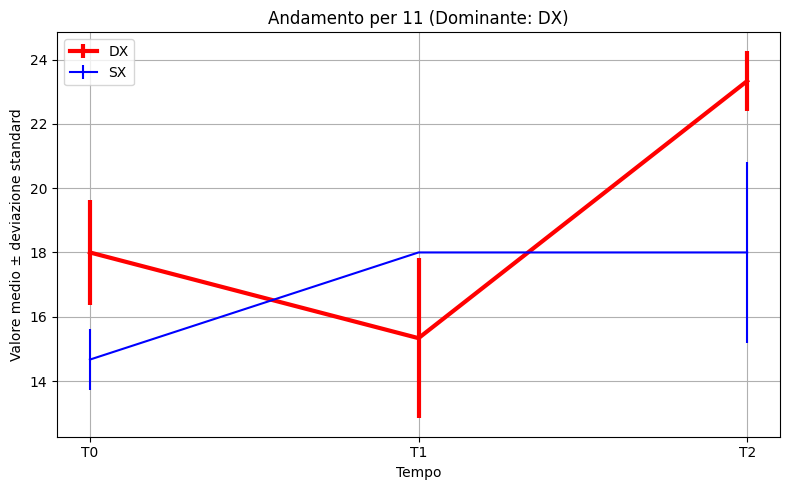

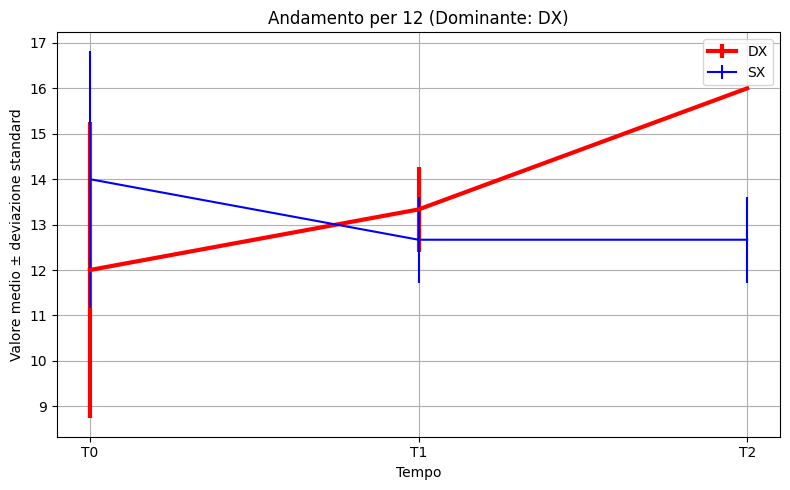

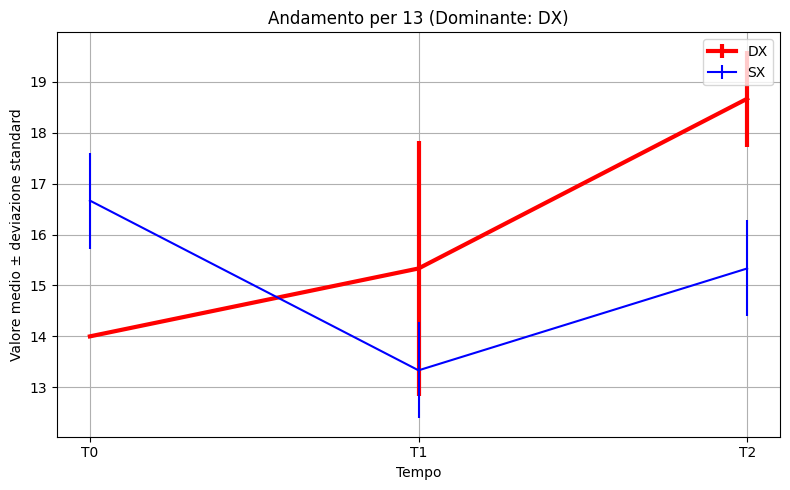

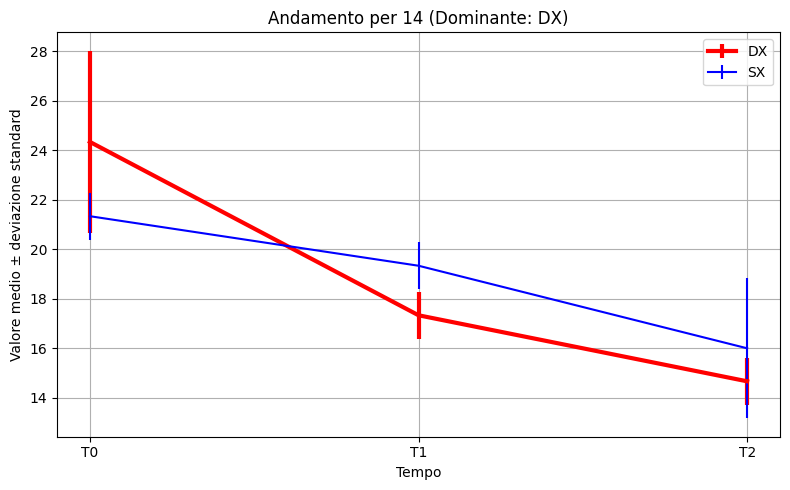

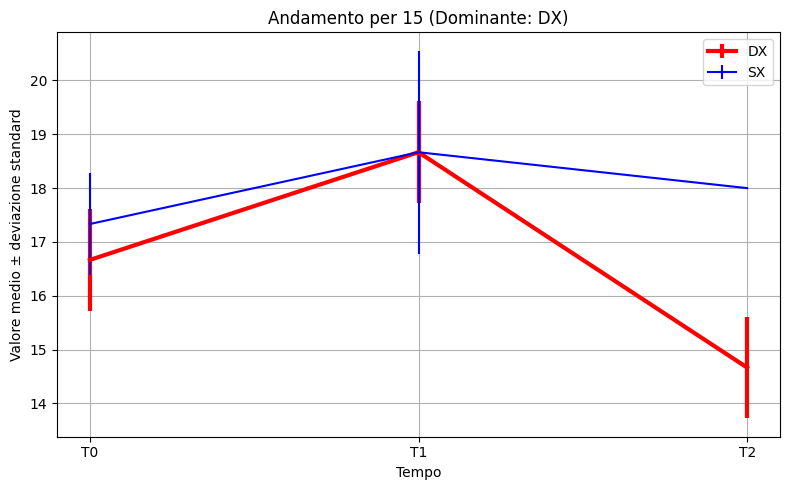

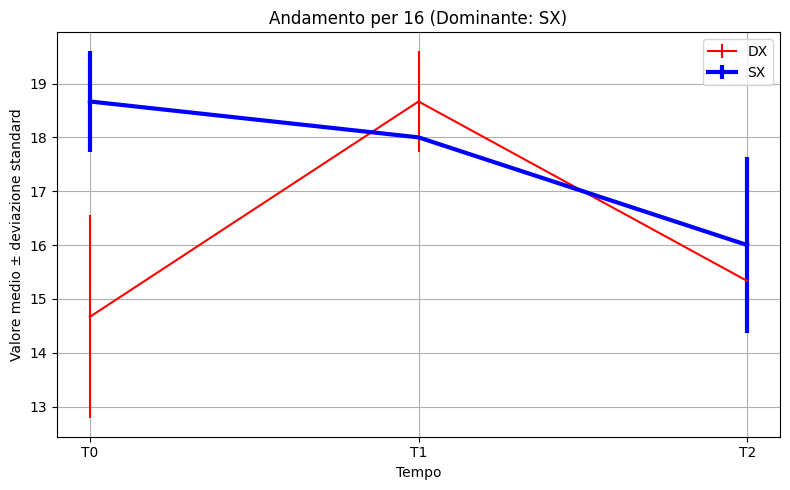

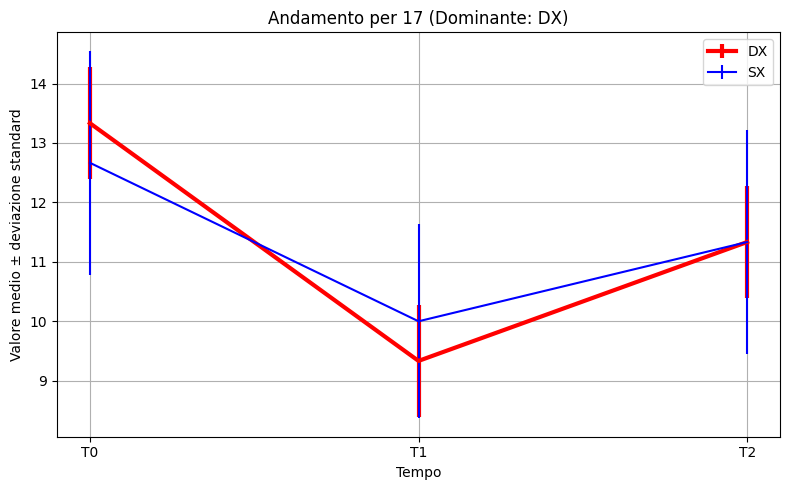

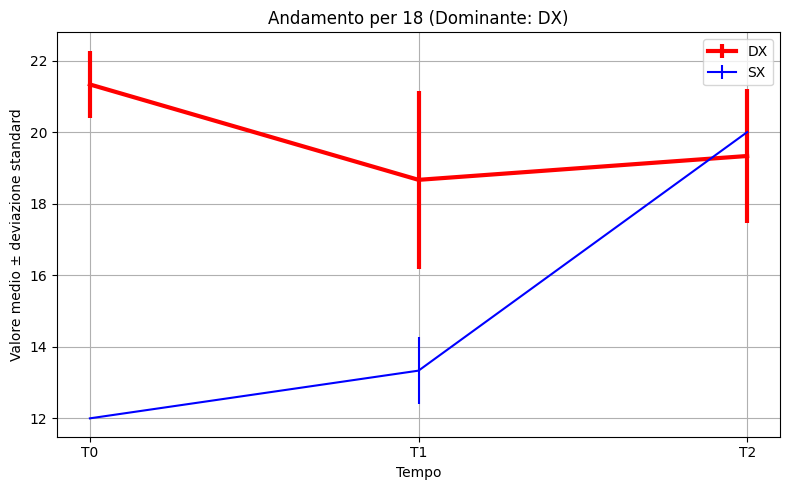

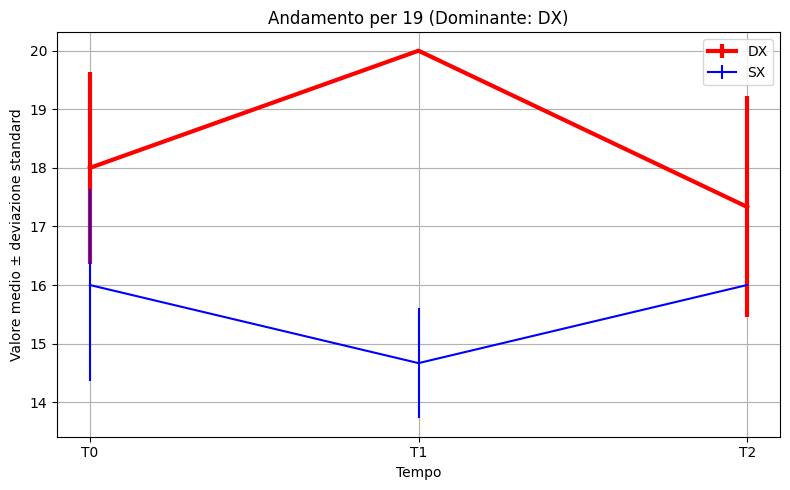

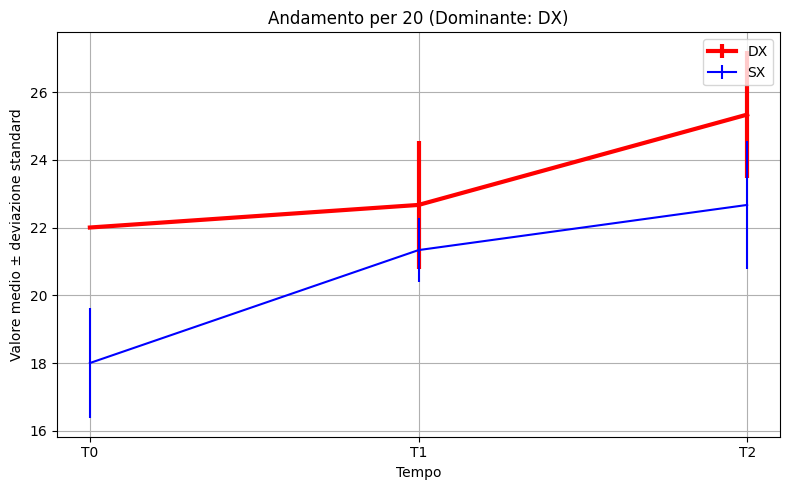

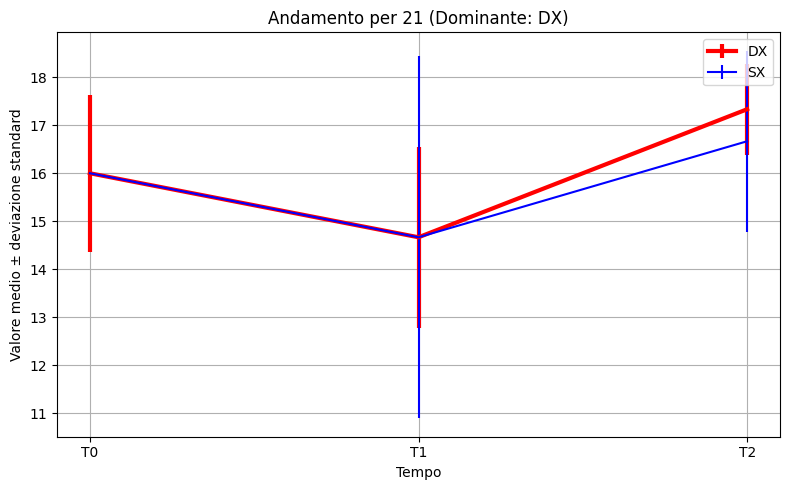

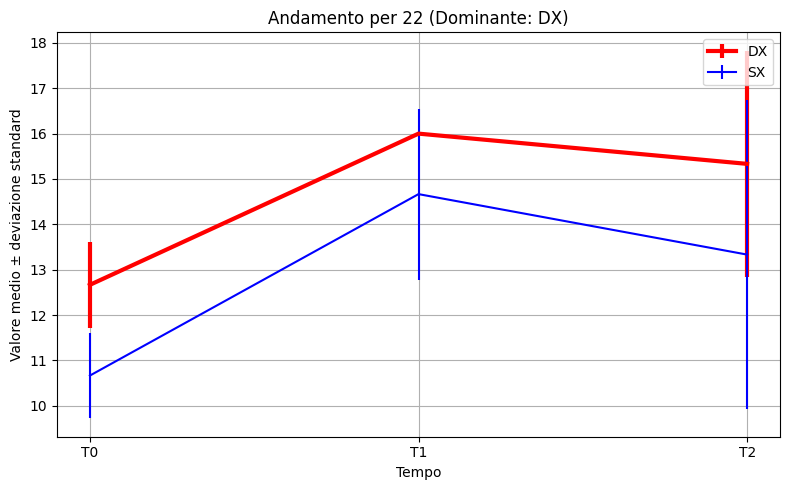

In [16]:

# Funzione per disegnare il grafico di un paziente
def plot_paziente(data, arto_dom, nome_paziente):
    tempi = ['T0', 'T1', 'T2']
    dx_media = []
    dx_std = []
    sx_media = []
    sx_std = []

    for t in tempi:
        dx_valori = [data[f'dx{i}_{t}'] for i in range(1, 4)]
        sx_valori = [data[f'sx{i}_{t}'] for i in range(1, 4)]
        dx_media.append(np.mean(dx_valori))
        dx_std.append(np.std(dx_valori))
        sx_media.append(np.mean(sx_valori))
        sx_std.append(np.std(sx_valori))

    plt.figure(figsize=(8, 5))
    # Curva dx
    plt.errorbar(tempi, dx_media, yerr=dx_std, label='DX', color='red',
                 linewidth=3 if arto_dom == 'dx' else 1.5)
    # Curva sx
    plt.errorbar(tempi, sx_media, yerr=sx_std, label='SX', color='blue',
                 linewidth=3 if arto_dom == 'sx' else 1.5)

    plt.title(f"Andamento per {nome_paziente} (Dominante: {arto_dom.upper()})")
    plt.xlabel("Tempo")
    plt.ylabel("Valore medio ± deviazione standard")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generazione grafici per i 3 pazienti
for idx, row in dati.iterrows():
    plot_paziente(row, row['arto_dom'], idx)
